## Content
1. Data Exploration.
  * Remove bad fields
  * Fill NA values
  * Transform some numerical features to categorical and vice versa
  * Add culculated data
  * Dealing with missing data
  * Correlation matrix for numerical features
  * Encode categorical features to numerical
  * Correlation matrix for encoded categorical features
2. Learn model
  * Regressions
    * Linear
    * lasso
    * lasso lars
    * ridge
    * elastic net
    * Xgboost
  * MLP

## Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
import warnings
import sklearn.linear_model as linear_model
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('../input/train.csv')

In [3]:
df_train.shape

(1460, 81)

### Remove bad fields

In [4]:
features = set(df_train.columns.tolist())
features.remove('Id')
features.remove('OverallQual')
features.remove('KitchenQual')
features.remove('HeatingQC')
features.remove('ExterQual')

In [5]:
len(features)

76

### Fill NA values

In [6]:
def fill_na(frame): 
    # Alley : data description says NA means "no alley access"
    frame["Alley"].fillna("None", inplace=True)
    # BedroomAbvGr : NA most likely means 0
    frame["BedroomAbvGr"].fillna(0, inplace=True)
    # BsmtQual etc : data description says NA for basement features is "no basement"
    frame["BsmtQual"].fillna("No", inplace=True)
    frame["BsmtCond"].fillna("No", inplace=True)
    frame["BsmtExposure"].fillna("No", inplace=True)
    frame["BsmtFinType1"].fillna("No", inplace=True)
    frame["BsmtFinType2"].fillna("No", inplace=True)
    frame["BsmtFullBath"].fillna(0, inplace=True)
    frame["BsmtHalfBath"].fillna(0, inplace=True)
    frame["BsmtUnfSF"].fillna(0, inplace=True)
    # CentralAir : NA most likely means No
    frame["CentralAir"].fillna("N", inplace=True)
    # Condition : NA most likely means Normal
    frame["Condition1"].fillna("Norm", inplace=True)
    frame["Condition2"].fillna("Norm", inplace=True)
    # EnclosedPorch : NA most likely means no enclosed porch
    frame["EnclosedPorch"].fillna(0, inplace=True)
    # External stuff : NA most likely means average
    frame["ExterCond"].fillna("TA", inplace=True)
    frame["ExterQual"].fillna("TA", inplace=True)
    # Fence : data description says NA means "no fence"
    frame["Fence"].fillna("No", inplace=True)
    # FireplaceQu : data description says NA means "no fireplace"
    frame["FireplaceQu"].fillna("No", inplace=True)
    frame["Fireplaces"].fillna(0, inplace=True)
    # Functional : data description says NA means typical
    frame["Functional"].fillna("Typ", inplace=True)
    # GarageType etc : data description says NA for garage features is "no garage"
    frame["GarageType"].fillna("No", inplace=True)
    frame["GarageFinish"].fillna("No", inplace=True)
    frame["GarageQual"].fillna("No", inplace=True)
    frame["GarageCond"].fillna("No", inplace=True)
    frame["GarageArea"].fillna(0, inplace=True)
    frame["GarageCars"].fillna(0, inplace=True)
    # HalfBath : NA most likely means no half baths above grade
    frame["HalfBath"].fillna(0, inplace=True)
    # HeatingQC : NA most likely means typical
    frame["HeatingQC"].fillna("TA", inplace=True)
    # KitchenAbvGr : NA most likely means 0
    frame["KitchenAbvGr"].fillna(0, inplace=True)
    # KitchenQual : NA most likely means typical
    frame["KitchenQual"].fillna("TA", inplace=True)
    # LotFrontage : NA most likely means no lot frontage
    frame["LotFrontage"].fillna(0, inplace=True)
    # LotShape : NA most likely means regular
    frame["LotShape"].fillna("Reg", inplace=True)
    # MasVnrType : NA most likely means no veneer
    frame["MasVnrType"].fillna("None", inplace=True)
    frame["MasVnrArea"].fillna(0, inplace=True)
    # MiscFeature : data description says NA means "no misc feature"
    frame["MiscFeature"].fillna("No", inplace=True)
    frame["MiscVal"].fillna(0, inplace=True)
    # OpenPorchSF : NA most likely means no open porch
    frame["OpenPorchSF"].fillna(0, inplace=True)
    # PavedDrive : NA most likely means not paved
    frame["PavedDrive"].fillna("N", inplace=True)
    # PoolQC : data description says NA means "no pool"
    frame["PoolQC"].fillna("No", inplace=True)
    frame["PoolArea"].fillna(0, inplace=True)
    # SaleCondition : NA most likely means normal sale
    frame["SaleCondition"].fillna("Normal", inplace=True)
    # ScreenPorch : NA most likely means no screen porch
    frame["ScreenPorch"].fillna(0, inplace=True)
    # TotRmsAbvGrd : NA most likely means 0
    frame["TotRmsAbvGrd"].fillna(0, inplace=True)
    # Utilities : NA most likely means all public utilities
    frame["Utilities"].fillna("AllPub", inplace=True)
    # WoodDeckSF : NA most likely means no wood deck
    frame["WoodDeckSF"].fillna(0, inplace=True)
    
fill_na(df_train)

### Transform some numerical features to categorical and vice versa

In [7]:
def make_transform(frame):
    
    # Some numerical features are actually really categories

    frame.replace(
        {
            "MSSubClass": {20: "SC20", 30: "SC30", 40: "SC40", 45: "SC45",
                           50: "SC50", 60: "SC60", 70: "SC70", 75: "SC75",
                           80: "SC80", 85: "SC85", 90: "SC90", 120: "SC120",
                           150: "SC150", 160: "SC160", 180: "SC180", 190: "SC190"},
            "MoSold": {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
                       7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
        },
        inplace=True
    )

    # Encode some categorical features as ordered numbers when there is information in the order

    frame.replace(
        {"Alley": {"Grvl": 1, "Pave": 2},
         "BsmtCond": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
         "BsmtExposure": {"No": 0, "Mn": 1, "Av": 2, "Gd": 3},
         "BsmtFinType1": {"No": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6},
         "BsmtFinType2": {"No": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6},
         "BsmtQual": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
         "ExterCond": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
         "ExterQual": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
         "FireplaceQu": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
         "Functional": {"Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8},
         "GarageCond": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
         "GarageQual": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
         "HeatingQC": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
         "KitchenQual": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
         "LandSlope": {"Sev": 1, "Mod": 2, "Gtl": 3},
         "LotShape": {"IR3": 1, "IR2": 2, "IR1": 3, "Reg": 4},
         "PavedDrive": {"N": 0, "P": 1, "Y": 2},
         "PoolQC": {"No": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
         "Street": {"Grvl": 1, "Pave": 2},
         "Utilities": {"ELO": 1, "NoSeWa": 2, "NoSewr": 3, "AllPub": 4}
         },
        inplace=True
    )
    
make_transform(df_train)

### Dealing with missing data

In [8]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
GarageYrBlt,75,0.051370
TotalBsmtSF,1,0.000685
BsmtFinSF2,1,0.000685
BsmtFinSF1,1,0.000685
ExterQual,0,0.000000


In [9]:
# remove features where data is missed more then 5 times
features = features.difference(set((missing_data[missing_data['Total'] > 5]).index.tolist()))

In [10]:
# remove left images where data is missed
df_train = df_train.drop(df_train.loc[df_train.isnull().any(axis=1)].index)
df_train[list(features)].isnull().sum().max() #just checking that there's no missing data missing...

0

In [11]:
# features left
len(features)

75

### Lists of numerical and categorical features

In [12]:
# get categorical features list
g = {k.name: v for k, v in df_train[list(features)].columns.to_series().groupby(df_train.dtypes).groups.items()}
categorical = g["object"].tolist()
numerical = g["float64"].tolist() + g["int64"].tolist()
g

{'float64': Index(['BsmtHalfBath', 'GarageCars', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtFinSF1',
        'BsmtFinSF2', 'MasVnrArea', 'TotalBsmtSF', 'LotFrontage', 'GarageArea'],
       dtype='object'),
 'int64': Index(['X2ndFlrSF', 'X3SsnPorch', 'LandSlope', 'SalePrice', 'BsmtQual',
        'OverallCond', 'Fireplaces', 'GrLivArea', 'YearBuilt', 'FireplaceQu',
        'X1stFlrSF', 'PoolQC', 'MiscVal', 'KitchenAbvGr', 'GarageCond',
        'OpenPorchSF', 'ScreenPorch', 'FullBath', 'ExterCond', 'HalfBath',
        'LotShape', 'WoodDeckSF', 'BsmtFinType1', 'PavedDrive', 'TotRmsAbvGrd',
        'BsmtFinType2', 'GarageQual', 'LotArea', 'PoolArea', 'EnclosedPorch',
        'YrSold', 'BedroomAbvGr', 'Utilities', 'Street', 'BsmtCond',
        'YearRemodAdd', 'Functional', 'BsmtExposure', 'LowQualFinSF'],
       dtype='object'),
 'object': Index(['Condition2', 'BldgType', 'GarageType', 'Electrical', 'RoofMatl',
        'MoSold', 'Fence', 'MSSubClass', 'MiscFeature', 'LandContour',
        'Heating', 

### Correlation matrix for numerical features

In [13]:
# numerical features list
numerical

['BsmtHalfBath',
 'GarageCars',
 'BsmtUnfSF',
 'BsmtFullBath',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'MasVnrArea',
 'TotalBsmtSF',
 'LotFrontage',
 'GarageArea',
 'X2ndFlrSF',
 'X3SsnPorch',
 'LandSlope',
 'SalePrice',
 'BsmtQual',
 'OverallCond',
 'Fireplaces',
 'GrLivArea',
 'YearBuilt',
 'FireplaceQu',
 'X1stFlrSF',
 'PoolQC',
 'MiscVal',
 'KitchenAbvGr',
 'GarageCond',
 'OpenPorchSF',
 'ScreenPorch',
 'FullBath',
 'ExterCond',
 'HalfBath',
 'LotShape',
 'WoodDeckSF',
 'BsmtFinType1',
 'PavedDrive',
 'TotRmsAbvGrd',
 'BsmtFinType2',
 'GarageQual',
 'LotArea',
 'PoolArea',
 'EnclosedPorch',
 'YrSold',
 'BedroomAbvGr',
 'Utilities',
 'Street',
 'BsmtCond',
 'YearRemodAdd',
 'Functional',
 'BsmtExposure',
 'LowQualFinSF']

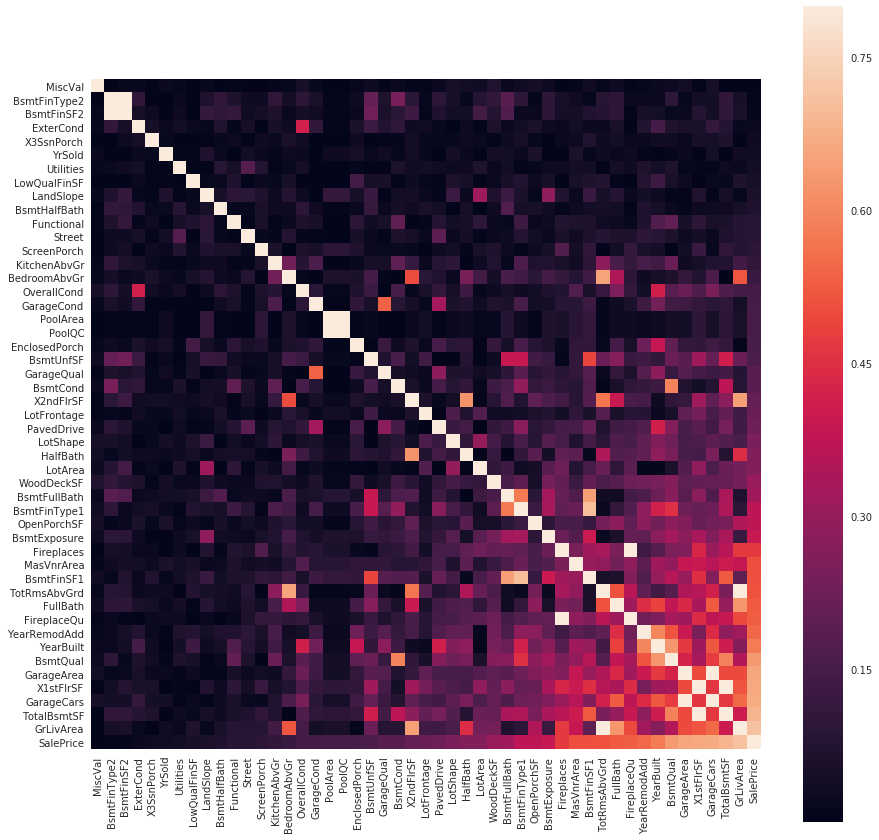

In [14]:
numerical_df = df_train[numerical]

#correlation matrix
corrmat = numerical_df.corr().abs()
# sort columns in df by SalePrice correlation
cols = corrmat.sort_values(["SalePrice"])['SalePrice'].index
# get new correlation matrix with sorted columns
cm = numerical_df[cols].corr().abs()
# show plot
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(cm, vmax=.8, square=True, yticklabels=cols.values, xticklabels=cols.values)

In [15]:
# dealing with features which highly correlated with each other

# features which correlated with each other more then this threshold should be considered to remove
thresh = 0.7

# mask to go through only under diagonal triangle
mask = np.ones(cm.shape,dtype='bool')
mask[np.triu_indices(len(cm))] = False

highly_corr_cm = cm.drop(index=['SalePrice'],columns=['SalePrice'])[(cm>thresh)&mask].dropna(axis=0, how='all').dropna(axis=1, how='all')
highly_corr_cm = highly_corr_cm.append(cm['SalePrice'][highly_corr_cm.columns])
highly_corr_cm['SalePrice'] = cm['SalePrice'][highly_corr_cm.index]
highly_corr_cm

,BsmtFinType2,PoolArea,BsmtFinType1,Fireplaces,TotRmsAbvGrd,GarageArea,X1stFlrSF,SalePrice
BsmtFinSF2,0.814645,NaN,NaN,NaN,NaN,NaN,NaN,0.011887
PoolQC,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.148786
BsmtFinSF1,NaN,NaN,0.703882,NaN,NaN,NaN,NaN,0.508887
FireplaceQu,NaN,NaN,NaN,0.858870,NaN,NaN,NaN,0.529272
GarageCars,NaN,NaN,NaN,NaN,NaN,0.848338,NaN,0.666219
TotalBsmtSF,NaN,NaN,NaN,NaN,NaN,NaN,0.816869,0.685218
GrLivArea,NaN,NaN,NaN,NaN,0.808546,NaN,NaN,0.711225
SalePrice,0.007118,0.148786,0.371798,0.469595,0.510387,0.658604,0.660012,1.000000


In [16]:
columns_to_remove = [
    "X1stFlrSF",
    "GarageArea",
    "TotRmsAbvGrd"]

In [17]:
numerical_df.drop(columns=columns_to_remove, inplace=True)

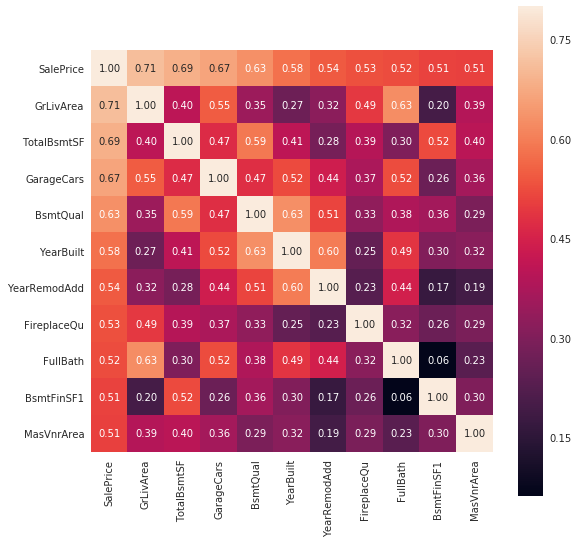

In [18]:
#saleprice correlation matrix
corrmat = numerical_df.corr().abs()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k+1, 'SalePrice')['SalePrice'].index
cm = numerical_df[cols].corr().abs()
sns.set(rc={'figure.figsize':(9,9)})
sns.heatmap(cm, vmax=.8, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [19]:
selected_numerical_features = cols.drop('SalePrice').tolist()
selected_numerical_features

['GrLivArea',
 'TotalBsmtSF',
 'GarageCars',
 'BsmtQual',
 'YearBuilt',
 'YearRemodAdd',
 'FireplaceQu',
 'FullBath',
 'BsmtFinSF1',
 'MasVnrArea']

### Encode categorical features to numerical

In [20]:
# categorical features list
categorical

['Condition2',
 'BldgType',
 'GarageType',
 'Electrical',
 'RoofMatl',
 'MoSold',
 'Fence',
 'MSSubClass',
 'MiscFeature',
 'LandContour',
 'Heating',
 'RoofStyle',
 'Alley',
 'SaleType',
 'Exterior1st',
 'GarageFinish',
 'Exterior2nd',
 'CentralAir',
 'SaleCondition',
 'MasVnrType',
 'Foundation',
 'HouseStyle',
 'LotConfig',
 'MSZoning',
 'Neighborhood',
 'Condition1']

In [21]:
len(categorical)

26

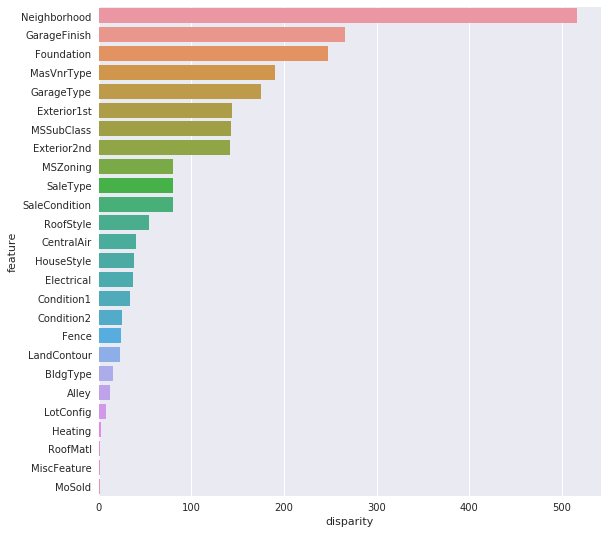

In [22]:
# perform ANOVA test 

def anova(frame, qualitative):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(df_train, g["object"].tolist())
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, y='feature', x='disparity')

In [23]:
# perform encoding

dummies = {}

def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature] = o
    
    return ordering
    
for c in categorical:  
    dummies[c] = encode(df_train, c)

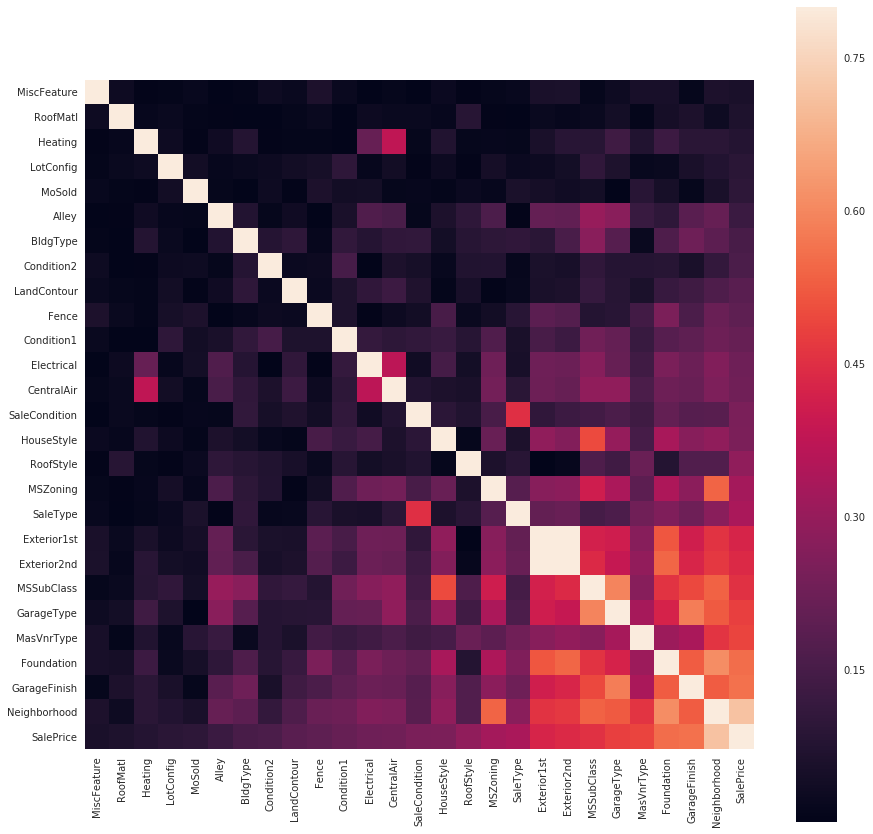

In [24]:
categorical_df = df_train[categorical + ['SalePrice']]

#correlation matrix
corrmat = categorical_df.corr().abs()
cols = corrmat.sort_values(["SalePrice"])['SalePrice'].index
cm = categorical_df[cols].corr().abs()
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(cm, vmax=.8, square=True, yticklabels=cols.values, xticklabels=cols.values)

In [25]:
mask = np.ones(cm.shape,dtype='bool')
mask[np.triu_indices(len(cm))] = False

In [26]:
thresh = 0.6
highly_corr_cm = cm.drop(index=['SalePrice'],columns=['SalePrice'])[(cm>thresh)&mask].dropna(axis=0, how='all').dropna(axis=1, how='all')
highly_corr_cm = highly_corr_cm.append(cm['SalePrice'][highly_corr_cm.columns])
highly_corr_cm['SalePrice'] = cm['SalePrice'][highly_corr_cm.index]
highly_corr_cm

,Exterior1st,Foundation,SalePrice
Exterior2nd,0.887130,NaN,0.437934
Neighborhood,NaN,0.610561,0.713078
SalePrice,0.426991,0.554700,1.000000


In [27]:
columns_to_remove = ["Exterior2nd"]

In [28]:
categorical_df.drop(columns=columns_to_remove, inplace=True)

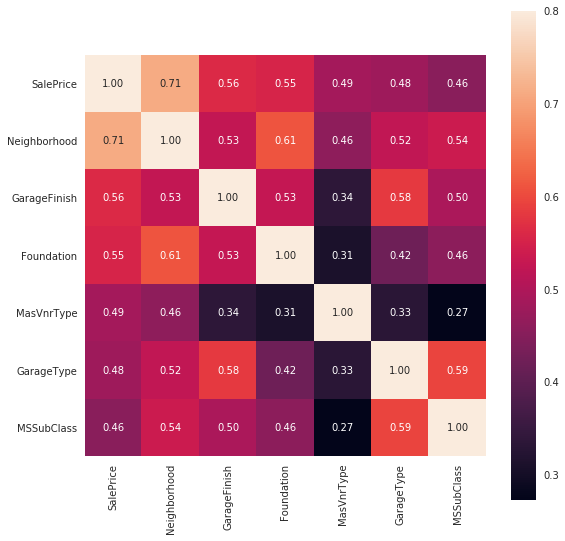

In [29]:
#saleprice correlation matrix
corrmat = categorical_df.corr().abs()
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k+1, 'SalePrice')['SalePrice'].index
cm = categorical_df[cols].corr().abs()
sns.set(rc={'figure.figsize':(9,9)})
sns.heatmap(cm, vmax=.8, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [30]:
selected_categorical_features = cols.drop('SalePrice').tolist()
selected_categorical_features

['Neighborhood',
 'GarageFinish',
 'Foundation',
 'MasVnrType',
 'GarageType',
 'MSSubClass']

### Summarize

In [31]:
features = selected_categorical_features + selected_numerical_features
features

['Neighborhood',
 'GarageFinish',
 'Foundation',
 'MasVnrType',
 'GarageType',
 'MSSubClass',
 'GrLivArea',
 'TotalBsmtSF',
 'GarageCars',
 'BsmtQual',
 'YearBuilt',
 'YearRemodAdd',
 'FireplaceQu',
 'FullBath',
 'BsmtFinSF1',
 'MasVnrArea']

## Learn model

In [32]:
def log_transformation(frame, feature):
    new_feature_name = new_log_feature_name(feature)
    frame[new_feature_name] = np.log1p(frame[feature].values)

def new_quadratic_feature_name(feature):
    return feature+'2'

def new_log_feature_name(feature):
    return feature+'Log'
    
def quadratic(frame, feature):
    new_feature_name = new_quadratic_feature_name(feature)
    frame[new_feature_name] = frame[feature]**2
    
def boolean_transformation(frame, feature, new_feature_name, threshold):
    frame[new_feature_name] = frame[feature].apply(lambda x: 1 if x > threshold else 0)
    
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

def error_mse(actual, predicted):
    actual = (actual)
    predicted = (predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

In [33]:
to_log_transform = ['GrLivArea', 'TotalBsmtSF', 'MasVnrArea', 'BsmtFinSF1']

to_pow_transform = ['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'Neighborhood', 'GrLivArea']

to_boolean_transform = {
    'TotalBsmtSF': {'new_feature_name': 'HasBasement', 'threshold': 0},
    'GarageArea':  {'new_feature_name': 'HasGarage', 'threshold': 0},
    'X2ndFlrSF':    {'new_feature_name': 'Has2ndFloor', 'threshold': 0},
    'MasVnrArea':  {'new_feature_name': 'HasMasVnr', 'threshold': 0},
    'WoodDeckSF':  {'new_feature_name': 'HasWoodDeck', 'threshold': 0},
    'OpenPorchSF': {'new_feature_name': 'HasPorch', 'threshold': 0},
    'PoolArea':    {'new_feature_name': 'HasPool', 'threshold': 0},
    'YearBuilt':   {'new_feature_name': 'IsNew', 'threshold': 2000},
}

added_boolean_columns = [
    'HasBasement', 
    'HasGarage', 
    'Has2ndFloor', 
    'HasMasVnr', 
    'HasWoodDeck',
    'HasPorch', 
    'HasPool', 
    'IsNew']

added_quadratic_columns = list(map(new_quadratic_feature_name, to_pow_transform))

added_log_columns = list(map(new_log_feature_name, to_log_transform))

def transform_before_learn(frame, to_log_transform, to_pow_transform, to_boolean_transform):

    for c in to_log_transform:
        log_transformation(frame, c)

    for c in to_pow_transform:
        quadratic(frame, c)

    for c in to_boolean_transform.keys():
        boolean_transformation(frame, c, to_boolean_transform[c]['new_feature_name'], 
                               to_boolean_transform[c]['threshold']) 


transform_before_learn(df_train, to_log_transform, to_pow_transform, to_boolean_transform)

In [34]:
features_full_list = features + added_boolean_columns + added_quadratic_columns + added_log_columns

## Prepare test data

In [35]:
def encode_test_df(frame, dummies):
    for feature in dummies.keys():
        for cat, o in dummies[feature].items():
            if frame[feature].dtype != np.int64:
                frame.loc[frame[feature] == cat, feature] = o

def prepare_test_df(test_frame):
    fill_na(test_frame)
    make_transform(test_frame)
    encode_test_df(df_test, dummies)
    transform_before_learn(test_frame, to_log_transform, to_pow_transform, to_boolean_transform)

In [36]:
df_test = pd.read_csv('../input/test.csv')

df_test.replace({'GrnHill': 13}, inplace=True)
df_test.replace({'Landmrk': 13}, inplace=True)

prepare_test_df(df_test)

df_test.fillna(0, inplace=True)
df_test.replace({'No': 0}, inplace=True)
df_test.replace({'SC150': 7}, inplace=True)
df_test.replace({'CBlock': 7}, inplace=True)

#df_test.replace({'AsphShn': 7}, inplace=True)



## Out liars

In [37]:
df_train_cleaned = df_train
#df_train_cleaned = df_train.drop(df_train[df_train['Id'] == 1299].index)
#df_train_cleaned = df_train.drop(df_train[df_train['Id'] == 524].index)

## Regression

### Linear

In [38]:
X = df_train_cleaned[features_full_list]
Y = df_train_cleaned['SalePrice'].values

full_X = df_train[features_full_list]
full_Y = df_train['SalePrice'].values

linear = linear_model.LinearRegression()
linear.fit(X, np.log1p(Y))

Ypred_linear = np.expm1(linear.predict(full_X))
print(error(full_Y, Ypred_linear))
print(error_mse(full_Y, Ypred_linear))

0.13909995920553156
23513.737068610295


#### test dataset

In [39]:
full_test_X = df_test[features_full_list]
test_Y = df_test['SalePrice'].values

test_pred = np.exp(linear.predict(full_test_X))

print(error(test_Y, test_pred))
print(error_mse(test_Y, test_pred))

0.18693439866390324
107544.80166784635


### Lasso

In [40]:
X = df_train_cleaned[features_full_list]
Y = df_train_cleaned['SalePrice'].values

full_X = df_train[features_full_list]
full_Y = df_train['SalePrice'].values

lasso = linear_model.LassoCV(max_iter=10000)
lasso.fit(X, np.log1p(Y))

Ypred_lasso = np.expm1(lasso.predict(full_X))
print(error(full_Y, Ypred_lasso))
print(error_mse(full_Y, Ypred_linear))

0.17538113952310513
23513.737068610295


#### test dataset

In [41]:
full_test_X = df_test[features_full_list]
test_Y = df_test['SalePrice'].values

test_pred = np.exp(lasso.predict(full_test_X))

print(error(test_Y, test_pred))
print(error_mse(test_Y, test_pred))

0.32717600356439597
8404303.136282522


### Lasso Lars

In [42]:
X = df_train_cleaned[features_full_list]
Y = df_train_cleaned['SalePrice'].values

full_X = df_train[features_full_list]
full_Y = df_train['SalePrice'].values

lasso_lars = linear_model.LassoLarsCV(max_iter=10000)
lasso_lars.fit(X, np.log1p(Y))

Ypred_lasso_lars = np.expm1(lasso_lars.predict(full_X))
print(error(full_Y, Ypred_lasso))
print(error_mse(full_Y, Ypred_lasso))

0.17538113952310513
34704.83588588174


#### test dataset

In [43]:
full_test_X = df_test[features_full_list]
test_Y = df_test['SalePrice'].values

test_pred = np.exp(lasso_lars.predict(full_test_X))

print(error(test_Y, test_pred))
print(error_mse(test_Y, test_pred))

0.19182983408071155
147303.9498203288


### RidgeCV

In [44]:
X = df_train_cleaned[features_full_list]
Y = df_train_cleaned['SalePrice'].values

full_X = df_train[features_full_list]
full_Y = df_train['SalePrice'].values

ridge = linear_model.RidgeCV(cv=20)
ridge.fit(X, np.log1p(Y))
Ypred_ridge = np.expm1(ridge.predict(full_X))
print(error(full_Y,Ypred_ridge))
print(error_mse(full_Y, Ypred_ridge))

0.13914846891740504
23537.07218392708


#### test dataset

In [45]:
full_test_X = df_test[features_full_list]
test_Y = df_test['SalePrice'].values

test_pred = np.exp(lasso_lars.predict(full_test_X))

print(error(test_Y, test_pred))
print(error_mse(test_Y, test_pred))

0.19182983408071155
147303.9498203288


### ElasticNetCV

In [46]:
X = df_train_cleaned[features_full_list]
Y = df_train_cleaned['SalePrice'].values

full_X = df_train[features_full_list]
full_Y = df_train['SalePrice'].values

elasticNet = linear_model.ElasticNetCV(cv=10, random_state=42)
elasticNet.fit(X, np.log1p(Y))
Ypred_elasticNet = np.expm1(elasticNet.predict(full_X))
print(error(full_Y,Ypred_elasticNet))
print(error_mse(full_Y, Ypred_elasticNet))

0.17538113968807353
34704.836121430366


#### test dataset

In [47]:
full_test_X = df_test[features_full_list]
test_Y = df_test['SalePrice'].values

test_pred = np.exp(elasticNet.predict(full_test_X))

print(error(test_Y, test_pred))
print(error_mse(test_Y, test_pred))

0.32717600522253026
8404303.66862885


### Xgboost

In [48]:
import xgboost as xgb

In [49]:
X = df_train_cleaned[features_full_list]
Y = df_train_cleaned['SalePrice'].values

full_X = df_train[features_full_list]
full_Y = df_train['SalePrice'].values

In [50]:
dtrain = xgb.DMatrix(X, label = np.log(Y))

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

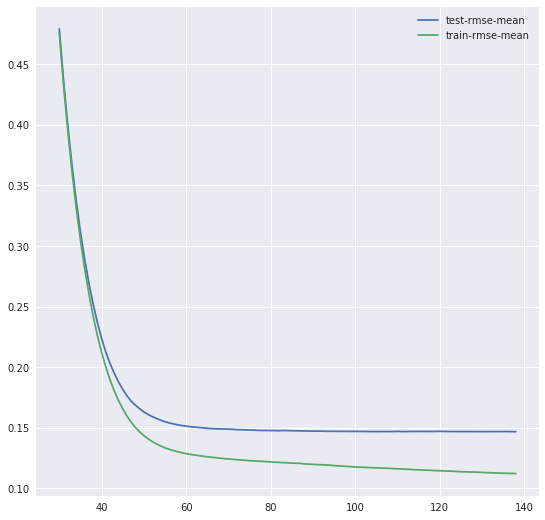

In [51]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [52]:
X_tr, X_val, y_tr, y_val = train_test_split(X, np.log(Y), random_state = 42, test_size=0.20)

eval_set = [(X_val, y_val)]

In [53]:
model_xgb = xgb.XGBRegressor(n_estimators=250, max_depth=2, learning_rate=0.1)
#model_xgb.fit(X_tr, y_tr, eval_metric="rmse", early_stopping_rounds=500, eval_set=eval_set, verbose=True)
model_xgb.fit(X, np.log1p(Y))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [54]:
xgb_preds = np.expm1(model_xgb.predict(full_X))
print(error(full_Y, xgb_preds))
print(error_mse(full_Y, xgb_preds))

0.11019907773075308
18246.883784358066


#### test dataset

In [55]:
full_test_X = df_test[features_full_list]
test_Y = df_test['SalePrice'].values

test_pred = np.exp(model_xgb.predict(full_test_X))

print(error(test_Y, test_pred))
print(error_mse(test_Y, test_pred))

0.15799117403163795
33567.49042524649


## Compare

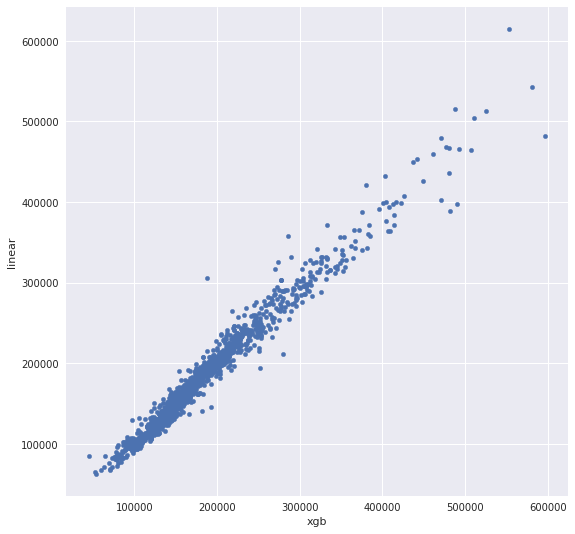

In [56]:
predictions = pd.DataFrame({"xgb":xgb_preds, "linear":Ypred_linear})
predictions.plot(x = "xgb", y = "linear", kind = "scatter")

## MLP

In [57]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint 
from keras.callbacks import LearningRateScheduler
from keras import optimizers
from sklearn.preprocessing import StandardScaler
from keras import backend as K
from keras import losses

Using TensorFlow backend.


In [58]:
tf.logging.set_verbosity(tf.logging.ERROR)
tf.set_random_seed(42)
np.random.seed(42)

In [59]:
mlp_feed = df_train[features]

In [60]:
scaler = StandardScaler()
scaler.fit(mlp_feed)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [61]:
X_train = scaler.transform(mlp_feed)

In [62]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, np.log(Y), random_state = 3, test_size=0.25)

In [63]:
min_treshold = 0.01
def learning_rate_scheduler(epoch, lr):
    new_rate = lr/pow(epoch+1, 1/10)
    if new_rate < min_treshold:
        return min_treshold
    else:
        return new_rate

In [64]:
model = Sequential()
model.add(Dense(20, input_dim = X_train.shape[1],  activation="sigmoid"))
model.add(Dense(10,  activation="sigmoid"))
model.add(Dense(10,  activation="sigmoid"))
model.add(Dense(10,  activation="sigmoid"))
model.add(Dense(10,  activation="sigmoid"))
model.add(Dense(1))

adam = optimizers.Adam()
sgd = optimizers.SGD()

model.compile(loss = losses.mean_squared_error, optimizer = adam)

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                340       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 891
Trainable params: 891
Non-trainable params: 0
_________________________________________________________________


In [66]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=20, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True)  # save best model
scheduler = LearningRateScheduler(learning_rate_scheduler, verbose=1)

In [67]:
hist = model.fit(X_tr, y_tr, batch_size=1, validation_data = (X_val, y_val), callbacks=[monitor, checkpointer], verbose=1, epochs=100)

Train on 1038 samples, validate on 346 samples
Epoch 1/100
1038/1038 [==============================] - 2s 2ms/step - loss: 47.5066 - val_loss: 8.8469
Epoch 2/100
1038/1038 [==============================] - 1s 1ms/step - loss: 2.5915 - val_loss: 0.3045
Epoch 3/100
1038/1038 [==============================] - 1s 1ms/step - loss: 0.1730 - val_loss: 0.1654
Epoch 4/100
1038/1038 [==============================] - 1s 1ms/step - loss: 0.1489 - val_loss: 0.1656
Epoch 5/100
1038/1038 [==============================] - 1s 1ms/step - loss: 0.1490 - val_loss: 0.1653
Epoch 6/100
1038/1038 [==============================] - 1s 1ms/step - loss: 0.1490 - val_loss: 0.1654
Epoch 7/100
1038/1038 [==============================] - 1s 1ms/step - loss: 0.1500 - val_loss: 0.1678
Epoch 8/100
1038/1038 [==============================] - 1s 1ms/step - loss: 0.1497 - val_loss: 0.1684
Epoch 9/100
1038/1038 [==============================] - 1s 1ms/step - loss: 0.1275 - val_loss: 0.0753
Epoch 10/100
1038/1038 [=

In [68]:
model.load_weights('best_weights.hdf5')  # load weights from best model

# Measure accuracy
to_predict = scaler.transform(mlp_feed)
Ypred_mlp = np.exp(model.predict(to_predict))
print(error(df_train['SalePrice'].values,Ypred_mlp))
print(error_mse(df_train['SalePrice'].values, Ypred_mlp))

19.711748634456264
3893843.298784293


#### test dataset

In [69]:
full_test_X = df_test[features]
test_Y = df_test['SalePrice'].values

test_pred = np.exp(model.predict(full_test_X))

print(error(test_Y, test_pred))
print(error_mse(test_Y, test_pred))

43.099295761617164
11776991.784335105


## Compare

In [70]:
Ypred_mlp.flatten()

array([169943.36, 118509.55, 149611.64, ..., 234637.5 , 228419.19,
       241540.53], dtype=float32)

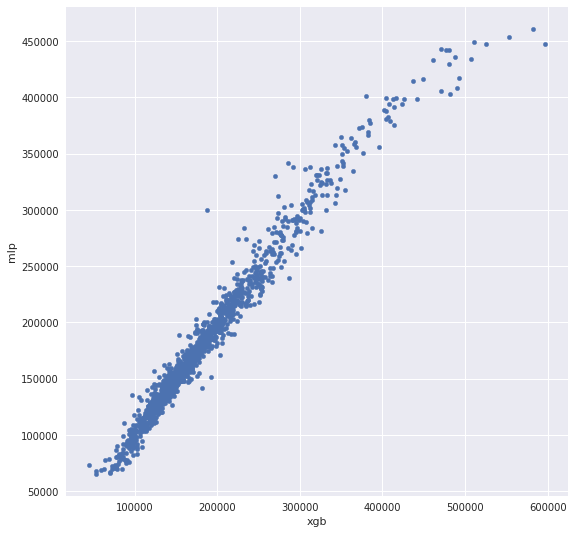

In [71]:
predictions = pd.DataFrame({"xgb":xgb_preds, "mlp":Ypred_mlp.flatten()})
predictions.plot(x = "xgb", y = "mlp", kind = "scatter")